Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [ ]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'Massachusetts'
state_short = 'MA' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('merged_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.328855 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 21968 lines in 0.682121 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Read 100 lines. Lines per second: 874.806

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/merged_data.csv

Parsing completed. Parsed 100 lines in 0.114761 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/merged_data.csv

Parsing completed. Parsed 21004 lines in 0.072234 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.371163 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 21968 lines in 0.483422 secs.

2290.3752100893557 at iteration  0


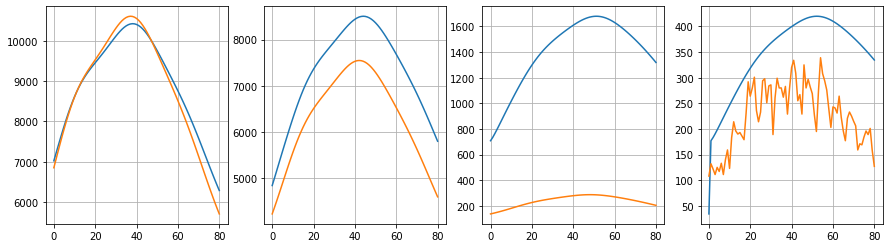

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218} 

2235.0782030770424 at iteration  1
2180.3954524181845 at iteration  2
2126.319030748803 at iteration  3
2072.841125864886 at iteration  4
2019.9540387120803 at iteration  5


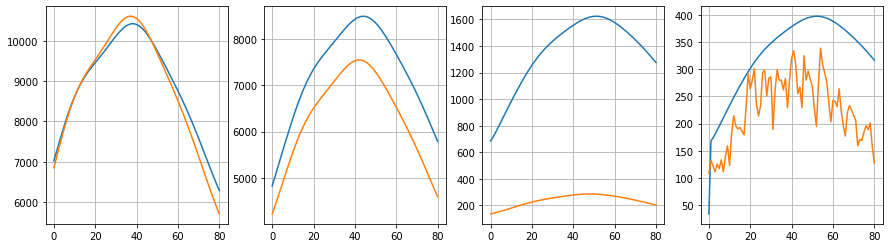

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8185048528064672, 'prob_severe': 0.1936771462105684, 'prob_hosp': 0.2449664861495447, 'prob_soujourn_inf_alpha': 3.410025073869011, 'prob_soujourn_inf_beta': 0.6048627534617135, 'prob_soujourn_symp_alpha': 1.620068073865148, 'prob_soujourn_symp_beta': 0.2175285944149509} 

1969.8280159043097 at iteration  6
1923.9474648533246 at iteration  7
1878.5414802054438 at iteration  8
1833.6043533795064 at iteration  9
1791.4756743523762 at iteration  10


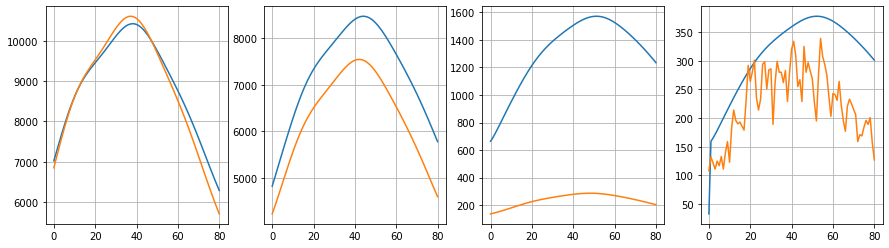

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8171524957075085, 'prob_severe': 0.18777829298928048, 'prob_hosp': 0.24032565962098584, 'prob_soujourn_inf_alpha': 3.410047147908303, 'prob_soujourn_inf_beta': 0.6047418649858518, 'prob_soujourn_symp_alpha': 1.6201282372529817, 'prob_soujourn_symp_beta': 0.21711074538921304} 

1752.8941363545555 at iteration  11
1714.6834746167008 at iteration  12
1676.8395396333665 at iteration  13
1639.3582333940185 at iteration  14
1602.2355086115972 at iteration  15


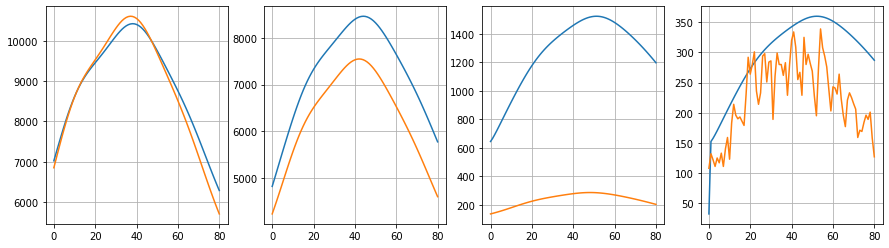

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8159633142633673, 'prob_severe': 0.18243141307697494, 'prob_hosp': 0.2361679900654316, 'prob_soujourn_inf_alpha': 3.4100656042259567, 'prob_soujourn_inf_beta': 0.604640707821714, 'prob_soujourn_symp_alpha': 1.6201788471720995, 'prob_soujourn_symp_beta': 0.21675796612559206} 

1565.467367964281 at iteration  16
1529.0498633502013 at iteration  17
1492.9790951548468 at iteration  18
1457.2512115309175 at iteration  19
1421.862407690375 at iteration  20


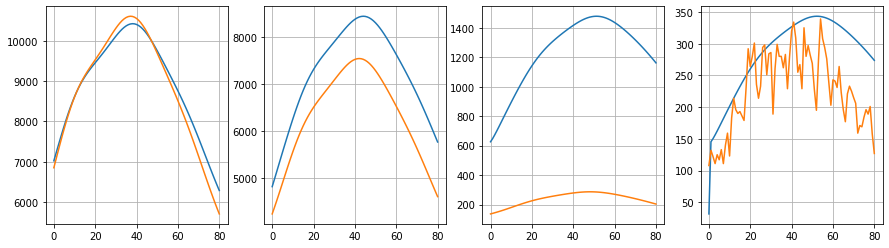

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.814828280829899, 'prob_severe': 0.1771846680502475, 'prob_hosp': 0.23213542571671783, 'prob_soujourn_inf_alpha': 3.4100831948449444, 'prob_soujourn_inf_beta': 0.6045442791165762, 'prob_soujourn_symp_alpha': 1.6202271284617986, 'prob_soujourn_symp_beta': 0.21642092828881176} 

1386.8089252084715 at iteration  21
1354.0636699450745 at iteration  22
1324.3331565546619 at iteration  23
1295.1393739084715 at iteration  24
1268.930279342983 at iteration  25


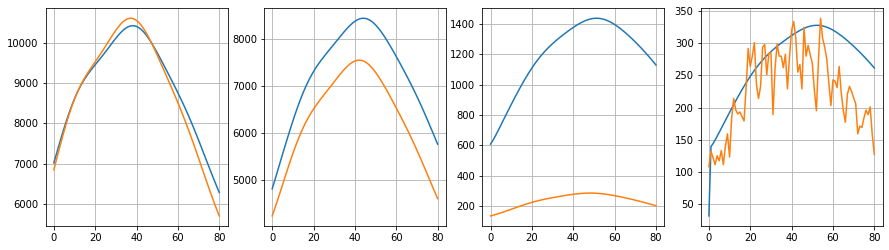

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8138014805345274, 'prob_severe': 0.1723001228697741, 'prob_hosp': 0.22842578842316924, 'prob_soujourn_inf_alpha': 3.4100985454702344, 'prob_soujourn_inf_beta': 0.6044600698312863, 'prob_soujourn_symp_alpha': 1.6202694609717725, 'prob_soujourn_symp_beta': 0.21612451267550345} 

1243.9793227940947 at iteration  26
1221.510087892148 at iteration  27
1199.2138077199556 at iteration  28
1177.088922144351 at iteration  29
1155.1510332534986 at iteration  30


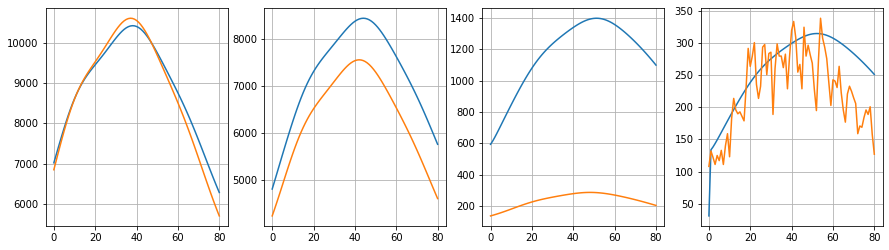

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8129383200691747, 'prob_severe': 0.16807356228768153, 'prob_hosp': 0.22525260568978692, 'prob_soujourn_inf_alpha': 3.4101105080312304, 'prob_soujourn_inf_beta': 0.6043943395690965, 'prob_soujourn_symp_alpha': 1.6203028235493788, 'prob_soujourn_symp_beta': 0.21588941392323815} 

1136.6239665716537 at iteration  31
1118.2276170603327 at iteration  32
1099.9609019415125 at iteration  33
1081.8227480758298 at iteration  34
1063.812091857902 at iteration  35


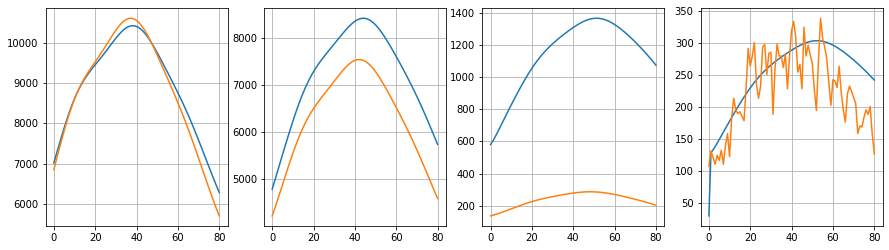

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8121844344803135, 'prob_severe': 0.16428540586732207, 'prob_hosp': 0.22243869358082508, 'prob_soujourn_inf_alpha': 3.410120144119798, 'prob_soujourn_inf_beta': 0.6043413203084554, 'prob_soujourn_symp_alpha': 1.6203299882529199, 'prob_soujourn_symp_beta': 0.21569696576237896} 

1046.5016950989498 at iteration  36
1032.6022892297135 at iteration  37
1018.7889497538343 at iteration  38
1005.0610488724143 at iteration  39
991.4179636637704 at iteration  40


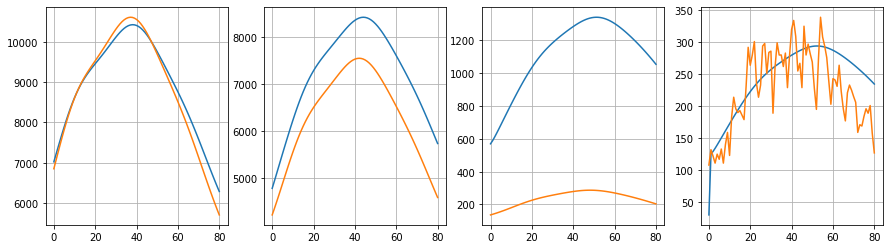

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8115250952987517, 'prob_severe': 0.16089082733105287, 'prob_hosp': 0.21994229075171262, 'prob_soujourn_inf_alpha': 3.41012825409537, 'prob_soujourn_inf_beta': 0.604296635599987, 'prob_soujourn_symp_alpha': 1.6203530661502537, 'prob_soujourn_symp_beta': 0.21553282645702398} 

977.9451033159578 at iteration  41
966.7809034716745 at iteration  42
956.4002786645693 at iteration  43
947.019381696091 at iteration  44
937.6867889262228 at iteration  45


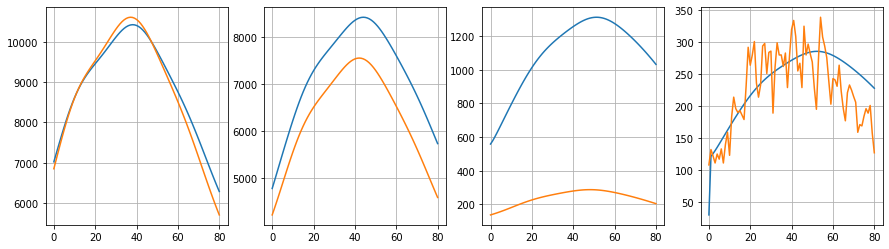

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8109669779973692, 'prob_severe': 0.15794778079498306, 'prob_hosp': 0.2177979840412408, 'prob_soujourn_inf_alpha': 3.410134402611831, 'prob_soujourn_inf_beta': 0.6042626598539788, 'prob_soujourn_symp_alpha': 1.620370918571689, 'prob_soujourn_symp_beta': 0.21540466542804204} 

928.4022063742549 at iteration  46
919.1653419444937 at iteration  47
909.9759054114185 at iteration  48
900.8336084049674 at iteration  49
892.6298817725411 at iteration  50


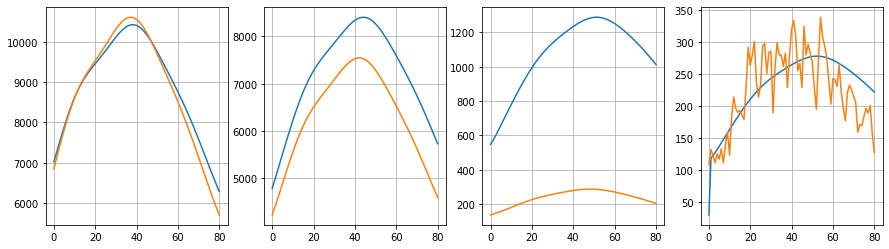

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.810462045563961, 'prob_severe': 0.15523069964114644, 'prob_hosp': 0.21583520905723189, 'prob_soujourn_inf_alpha': 3.4101396100196624, 'prob_soujourn_inf_beta': 0.6042338172999717, 'prob_soujourn_symp_alpha': 1.6203862522148484, 'prob_soujourn_symp_beta': 0.21529379402176996} 

887.1790986195565 at iteration  51
881.7499000034784 at iteration  52
876.3421846883696 at iteration  53
870.9558519324337 at iteration  54
865.5908014850445 at iteration  55


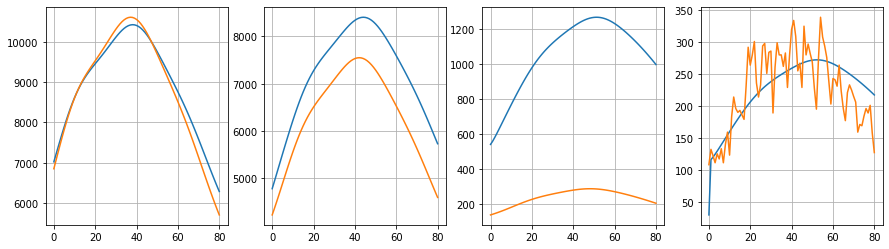

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.81008386264114, 'prob_severe': 0.15313931360139899, 'prob_hosp': 0.21433617267648114, 'prob_soujourn_inf_alpha': 3.4101418976526072, 'prob_soujourn_inf_beta': 0.6042209064569457, 'prob_soujourn_symp_alpha': 1.620393832865741, 'prob_soujourn_symp_beta': 0.21523634406634215} 

860.2469335837991 at iteration  56
854.9241489515857 at iteration  57
849.6223487936749 at iteration  58
844.341434794829 at iteration  59
839.0813091164302 at iteration  60


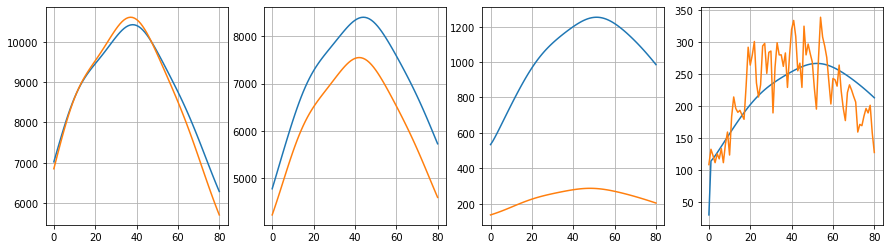

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.809713409309969, 'prob_severe': 0.1510633736954891, 'prob_hosp': 0.21285807258562234, 'prob_soujourn_inf_alpha': 3.410144137760712, 'prob_soujourn_inf_beta': 0.6042082635103201, 'prob_soujourn_symp_alpha': 1.6204012527485603, 'prob_soujourn_symp_beta': 0.21518010132810486} 

833.8418743936297 at iteration  61
828.6230337325146 at iteration  62
823.424690707294 at iteration  63
818.2467493575036 at iteration  64
813.0891141852308 at iteration  65


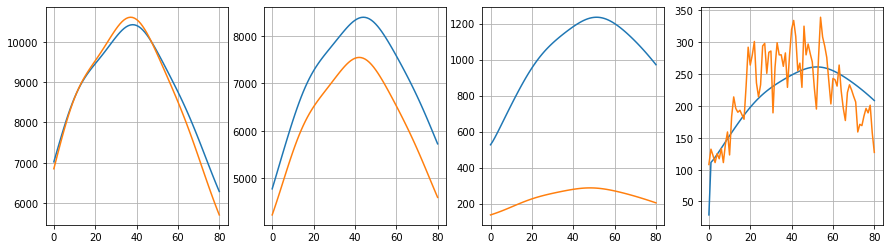

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8093505408752236, 'prob_severe': 0.14900264562711754, 'prob_hosp': 0.21140072790913567, 'prob_soujourn_inf_alpha': 3.410146331272728, 'prob_soujourn_inf_beta': 0.6041958832385705, 'prob_soujourn_symp_alpha': 1.6204085151347696, 'prob_soujourn_symp_beta': 0.21512504172792815} 

807.9516901523548 at iteration  66
802.8343826778083 at iteration  67
798.3482032384869 at iteration  68
794.6104252470857 at iteration  69
790.8851579414144 at iteration  70


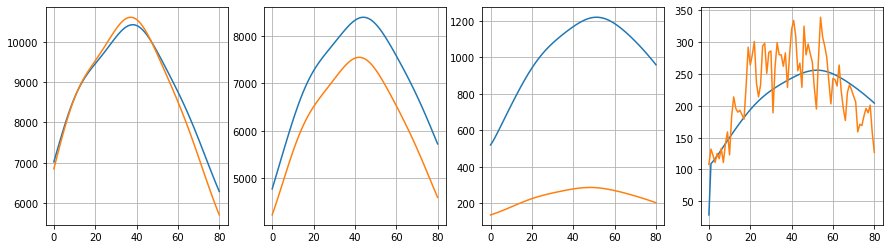

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.809016189015895, 'prob_severe': 0.14707256143441785, 'prob_hosp': 0.21004503830040616, 'prob_soujourn_inf_alpha': 3.4101479773703196, 'prob_soujourn_inf_beta': 0.6041865011044241, 'prob_soujourn_symp_alpha': 1.6204142939053756, 'prob_soujourn_symp_beta': 0.21508031595081728} 

787.1723512567721 at iteration  71
783.4719553327045 at iteration  72
779.7839205119714 at iteration  73
776.1081973395195 at iteration  74


In [128]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'at iteration ', n)
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<5e-10:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=100, step_size=5e-8, n_steps_between_print=5, lambda_reg=1,epsilon_stop=5e-8)



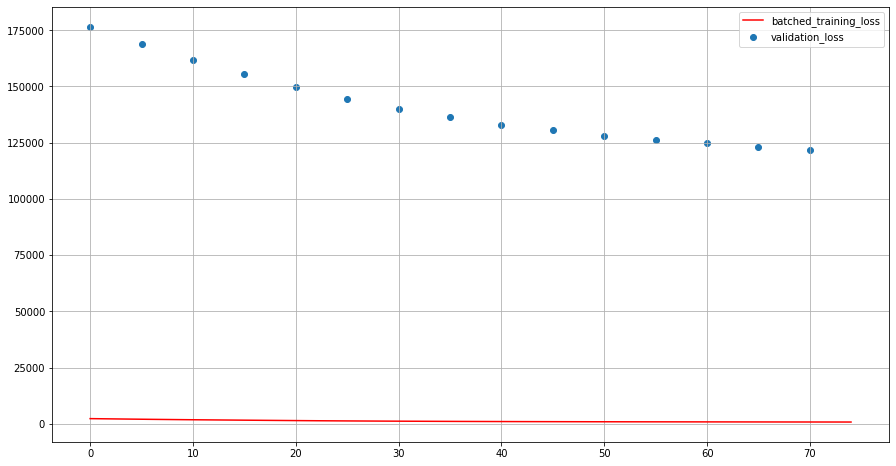

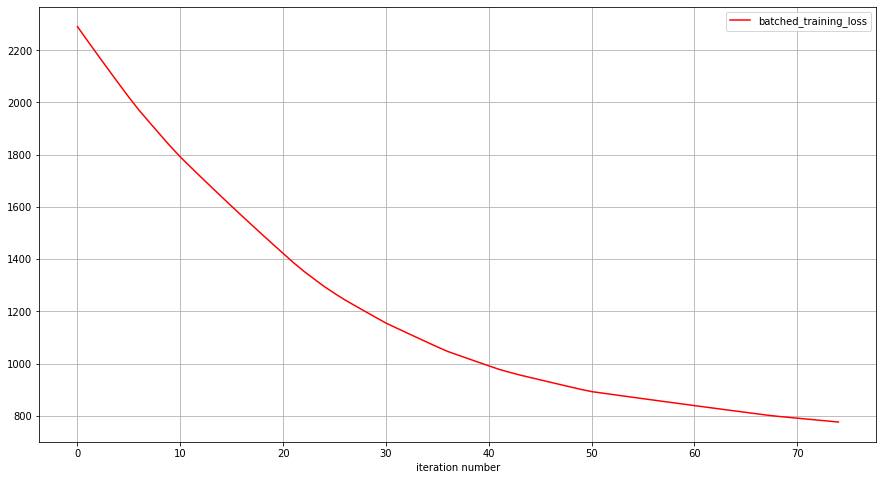

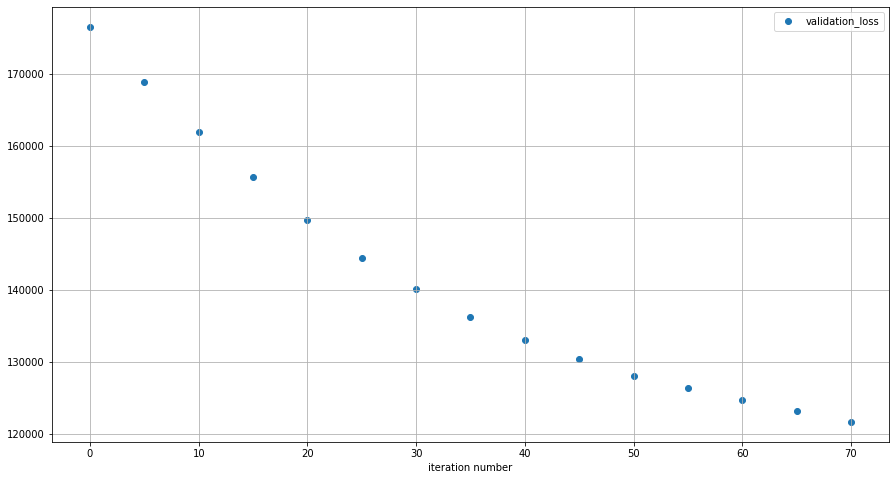

In [129]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-130-0dfccca19b1c>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


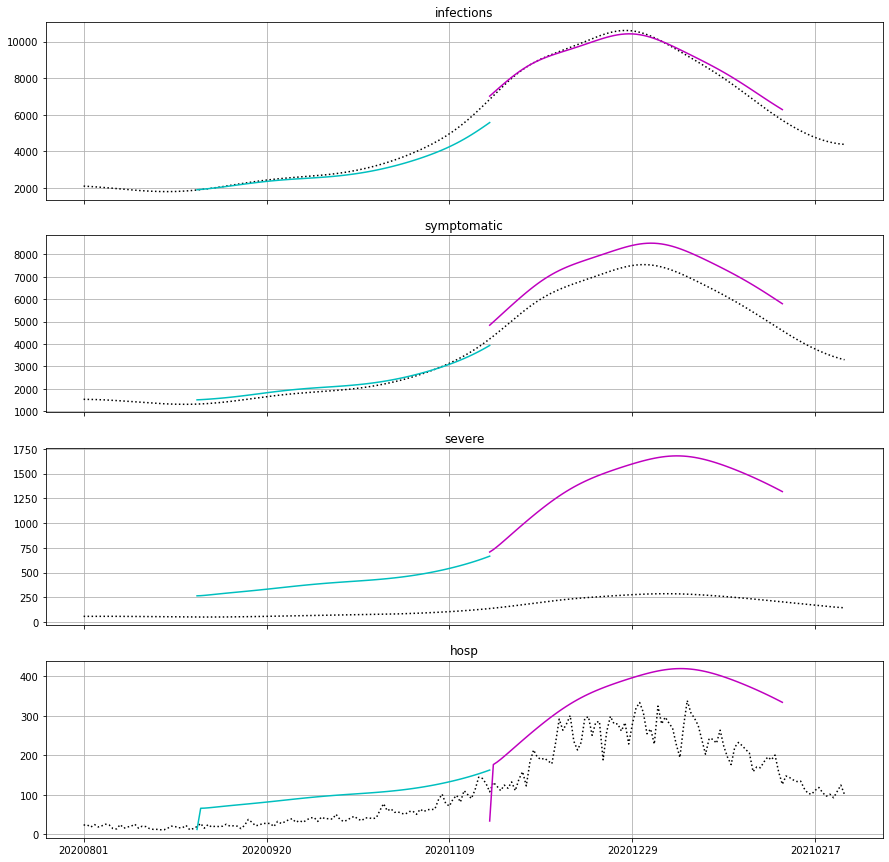

{'T_serial': 5.8, 'prob_sympt': 0.8087783201972121, 'prob_severe': 0.14567605663430994, 'prob_hosp': 0.20906989832598177, 'prob_soujourn_inf_alpha': 3.410148673752631, 'prob_soujourn_inf_beta': 0.6041823899388508, 'prob_soujourn_symp_alpha': 1.620417251298316, 'prob_soujourn_symp_beta': 0.21505609494021743}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-130-0dfccca19b1c>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


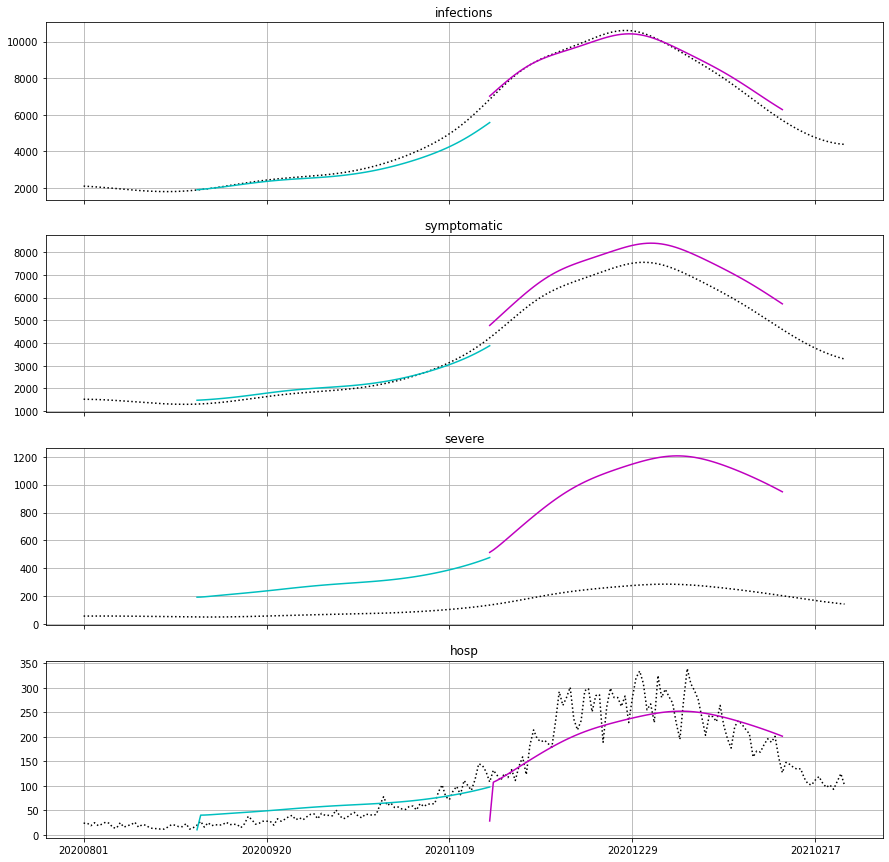

In [130]:
def plot_performance(new_params):
    color_list = ['k','k','k','k']
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['infections', 'symptomatic', 'severe','hosp'],color_list)):

        eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")

        for pd in pd_list_val:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = '-' )")



        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [5]:
import pickle


filename = state_short + '_population_params'
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

True
{'T_serial': 5.8, 'prob_sympt': 0.8174142162112285, 'prob_severe': 0.1889338776858409, 'prob_hosp': 0.24123045989401662, 'prob_soujourn_inf_alpha': 3.410042908646139, 'prob_soujourn_inf_beta': 0.6047650851624452, 'prob_soujourn_symp_alpha': 1.6201166690092077, 'prob_soujourn_symp_beta': 0.21719117061425203}
